# Predicting Real Estate Valuation Using Support Vector Machines Models

### ***Yabra Muvdi***


Home valuation is key in real estate industry, and also the basis for mortgages in credit sector. Here we have to predict the estimated value of a property. The data consists of a list of features plus the resulting $parcelvalue$, described in *Case_data_dictionary.xlsx* file. Each row corresponds to a particular home valuation, and $transactiondate$ is the date when the property was effectively sold. Properties are defined by $lotid$, but be aware that one property can be sold more than once (it's not the usual case). Also notice that some features are sometime empty, your model has to deal with it. Note that you don't have to use $totaltaxvalue$, $buildvalue$ or $landvalue$, because they are closely correlated with the final value to predict.

## Step 1: Read data, report missing data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pylab as plt
from utils.helper_functions import *

In [2]:
data = pd.read_csv('Data/Regression_Supervised_Train_reduced.csv')

In [3]:
#Understand the size of the data set
data.shape

(24755, 48)

In [4]:
data.describe()

,lotid,logerror,aircond,style,basement,numbath,numbedroom,classbuild,qualitybuild,decktype,...,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,taxdelinquencyyear,mypointer
count,2.475500e+04,1763.000000,14464.000000,233.000000,56.000000,24755.000000,24755.000000,18.000000,14654.000000,712.0,...,14761.000000,24743.000000,9634.000000,2.475200e+04,2.475500e+04,24755.000000,2.475500e+04,24754.000000,886.000000,24755.000000
mean,1.335009e+07,0.012562,2.107232,7.141631,636.839286,2.603514,3.297637,3.833333,5.640235,66.0,...,1.006300,1972.886473,1.540378,2.382736e+05,5.430185e+05,2015.281761,3.047738e+05,6665.055184,13.969526,17672.183559
std,3.444823e+06,0.129091,3.384228,2.051415,488.847319,1.045068,1.072567,0.383482,2.251645,0.0,...,0.123305,18.745019,0.531651,2.928330e+05,7.259855e+05,0.449867,4.930763e+05,8999.000816,1.523517,10215.193608
min,1.071173e+07,-0.605100,1.000000,2.000000,68.000000,0.000000,0.000000,3.000000,1.000000,66.0,...,1.000000,1880.000000,1.000000,1.010000e+02,1.562300e+04,2015.000000,1.300000e+02,49.080000,6.000000,1.000000
25%,1.108076e+07,-0.026479,1.000000,7.000000,255.000000,2.000000,3.000000,4.000000,4.000000,66.0,...,1.000000,1961.000000,1.000000,1.141252e+05,2.396560e+05,2015.000000,9.468850e+04,3042.225000,14.000000,8850.500000
50%,1.212766e+07,0.005000,1.000000,7.000000,556.000000,2.500000,3.000000,4.000000,6.000000,66.0,...,1.000000,1974.000000,2.000000,1.725460e+05,3.842500e+05,2015.000000,1.936930e+05,4744.815000,14.500000,17660.000000
75%,1.467828e+07,0.036462,1.000000,7.000000,929.250000,3.000000,4.000000,4.000000,7.000000,66.0,...,1.000000,1986.000000,2.000000,2.631998e+05,6.090000e+05,2016.000000,3.548305e+05,7387.355000,15.000000,26537.500000
max,1.629608e+08,2.489000,13.000000,21.000000,2485.000000,19.000000,11.000000,4.000000,12.000000,66.0,...,9.000000,2016.000000,3.000000,1.023363e+07,2.563981e+07,2016.000000,2.430208e+07,311386.080000,15.000000,35363.000000


In [5]:
#Exploring the pressence of missing values (as a percentage of all the observartions)
missing = data.isna().sum()/data.shape[0]
data.isna().sum()/data.shape[0]

lotid                 0.000000
logerror              0.928782
transactiondate       0.928782
aircond               0.415714
style                 0.990588
basement              0.997738
numbath               0.000000
numbedroom            0.000000
classbuild            0.999273
qualitybuild          0.408039
decktype              0.971238
finishedarea1st       0.751848
finishedarea          0.002545
perimeterarea         1.000000
totalarea             0.997495
finishedareaEntry     0.751848
countycode            0.000000
numfireplace          0.000000
numfullbath           0.001454
garagenum             0.596284
garagearea            0.596284
tubflag               0.949707
heatingtype           0.362189
latitude              0.000000
longitude             0.000000
lotarea               0.028641
poolnum               0.486124
poolarea              0.951283
citycode              0.001252
countycode2           0.000000
neighborhoodcode      0.392971
regioncode            0.000081
roomnum 

Missin values are clearly an important issue that deserves consideration for this dataset

## Step 2: Remove features with missing data, and then observations with missing data

Hint: use on your dataframe .dropna(axis=1) with thresh parameters

### Step 2.1. : Handling features with high percentage of missing values
As a first approach I am going to eliminate the columns that have more than a certain range of missing values

In [6]:
# Explore the columns with more than 20%
cols_missing = data.columns[missing > 0.2]

In [7]:
len(cols_missing)

27

In [8]:
data.shape

(24755, 48)

20% appears to be a pretty low threshold because if I use it, I will be dropping 27 variables (out of 46)

In [9]:
# Lets try with 41%
cols_missing = data.columns[missing > 0.41]

In [10]:
len(cols_missing)

23

In [11]:
data = data.drop(axis=1,labels = cols_missing)

In [12]:
data

,lotid,numbath,numbedroom,qualitybuild,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,...,regioncode,roomnum,unitnum,year,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,mypointer
0,17214744,2.0,3,NaN,1255.0,6111,1,2.0,NaN,34191029,...,96351.0,6,NaN,1979.0,103993.0,142212.0,2015,38219.0,1715.08,25711
1,12018724,2.0,1,4.0,1033.0,6037,0,2.0,2.0,34092200,...,96050.0,0,1.0,1973.0,129428.0,301141.0,2015,171713.0,3851.88,13268
2,11306699,3.0,4,4.0,2982.0,6037,0,3.0,2.0,34696444,...,97319.0,0,1.0,2004.0,175069.0,235062.0,2015,59993.0,3818.24,5423
3,11047729,2.0,3,7.0,1757.0,6037,0,2.0,2.0,34252019,...,96371.0,0,1.0,1952.0,162926.0,270543.0,2015,107617.0,3450.67,26198
4,17174848,3.0,2,NaN,1951.0,6111,0,3.0,NaN,34146639,...,97109.0,6,NaN,1988.0,180532.0,300886.0,2015,120354.0,3394.26,25187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,11633053,3.0,2,7.0,1382.0,6037,0,3.0,2.0,34084400,...,96050.0,0,1.0,1982.0,214623.0,786817.0,2016,572194.0,9550.24,8421
24751,10751511,2.0,2,7.0,1127.0,6037,0,2.0,2.0,34134687,...,96336.0,0,1.0,1973.0,96981.0,282464.0,2015,185483.0,4086.50,29610
24752,10719915,2.0,4,6.0,2179.0,6037,0,2.0,2.0,34206172,...,96342.0,0,1.0,1962.0,102310.0,419389.0,2016,317079.0,5259.98,17317
24753,11639212,5.0,5,10.0,3807.0,6037,0,5.0,2.0,34071872,...,96086.0,0,1.0,1923.0,693832.0,3437492.0,2015,2743660.0,40656.13,6587


### Step 2.2. : Handling rows with missing data

With my reduced dataset, I will now remove the rows that have missing data

In [13]:
df_final = data.dropna(axis = 0)

In [14]:
X = df_final.drop(['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue'], axis = 1) # keep only the features
y = df_final["parcelvalue"]  # This is the classificatoin outcome

In [15]:
# Verify that, indeed, the features have no missing values
X.isna().sum()

numbath             0
numbedroom          0
qualitybuild        0
finishedarea        0
countycode          0
numfireplace        0
numfullbath         0
heatingtype         0
latitude            0
longitude           0
lotarea             0
citycode            0
countycode2         0
neighborhoodcode    0
regioncode          0
roomnum             0
unitnum             0
year                0
taxyear             0
mypointer           0
dtype: int64

In [16]:
y.isna().sum()

0

## Step 3: Create dummies for relevant features

### Step 3.1. : Exploration of variables and creation of dummies

In [17]:
# Let's explore again the features that we have at the moment. Which ones are categorical?
X

,numbath,numbedroom,qualitybuild,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,countycode2,neighborhoodcode,regioncode,roomnum,unitnum,year,taxyear,mypointer
3,2.0,3,7.0,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,3101,116646.0,96371.0,0,1.0,1952.0,2015,26198
6,3.0,3,8.0,1663.0,6037,0,3.0,2.0,34284508,-118493574,12102.0,12447.0,3101,31817.0,96370.0,0,1.0,1961.0,2016,4138
8,3.0,3,4.0,1777.0,6037,0,3.0,2.0,34076404,-118560997,363116.0,12447.0,3101,19810.0,96120.0,0,1.0,1978.0,2015,5706
9,3.0,4,4.0,2198.0,6037,0,3.0,2.0,34398126,-118448101,5815.0,54311.0,3101,37739.0,96401.0,0,1.0,2000.0,2015,13350
13,3.0,3,4.0,1231.0,6037,0,3.0,2.0,34315800,-118443000,140609.0,12447.0,3101,34213.0,96368.0,0,1.0,1989.0,2015,6123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24747,5.0,4,10.0,4611.0,6037,0,5.0,2.0,34104857,-118484435,341421.0,12447.0,3101,113910.0,96030.0,0,1.0,1990.0,2015,2098
24748,3.0,3,9.0,3340.0,6037,0,3.0,2.0,34113968,-118362226,8847.0,12447.0,3101,274049.0,96027.0,0,1.0,1975.0,2016,26310
24750,3.0,2,7.0,1382.0,6037,0,3.0,2.0,34084400,-118379000,17166.0,48424.0,3101,762180.0,96050.0,0,1.0,1982.0,2016,8421
24751,2.0,2,7.0,1127.0,6037,0,2.0,2.0,34134687,-118725713,289439.0,9840.0,3101,764088.0,96336.0,0,1.0,1973.0,2015,29610


In [18]:
X_cont = X.copy()

In [19]:
#Heating type
X.heatingtype.value_counts()

2.0     11509
7.0       814
20.0        9
Name: heatingtype, dtype: int64

In [20]:
heating = pd.get_dummies(X.heatingtype, prefix = 'heating_type', drop_first = True)
heating

,heating_type_7.0,heating_type_20.0
3,0,0
6,0,0
8,0,0
9,0,0
13,0,0
...,...,...
24747,0,0
24748,0,0
24750,0,0
24751,0,0


In [21]:
#Counties
X.countycode.value_counts()

6037    12332
Name: countycode, dtype: int64

In [22]:
#The same thing happens with the second county code
X.countycode2.value_counts()

3101    12332
Name: countycode2, dtype: int64

This dataset only has one county, so the feature is worthless

In [23]:
X_cont = X_cont.drop(['countycode', 'countycode2'], axis = 1)

In [24]:
# Latitude
len(X.latitude.value_counts())

9642

In [25]:
# Longitude
len(X.longitude.value_counts())

8874

These two features have such a large number of different categories that they might not be adding a lot of value to the model

In [26]:
X_cont = X_cont.drop(['latitude', 'longitude'], axis = 1)

In [27]:
X_cont

,numbath,numbedroom,qualitybuild,finishedarea,numfireplace,numfullbath,heatingtype,lotarea,citycode,neighborhoodcode,regioncode,roomnum,unitnum,year,taxyear,mypointer
3,2.0,3,7.0,1757.0,0,2.0,2.0,8612.0,12447.0,116646.0,96371.0,0,1.0,1952.0,2015,26198
6,3.0,3,8.0,1663.0,0,3.0,2.0,12102.0,12447.0,31817.0,96370.0,0,1.0,1961.0,2016,4138
8,3.0,3,4.0,1777.0,0,3.0,2.0,363116.0,12447.0,19810.0,96120.0,0,1.0,1978.0,2015,5706
9,3.0,4,4.0,2198.0,0,3.0,2.0,5815.0,54311.0,37739.0,96401.0,0,1.0,2000.0,2015,13350
13,3.0,3,4.0,1231.0,0,3.0,2.0,140609.0,12447.0,34213.0,96368.0,0,1.0,1989.0,2015,6123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24747,5.0,4,10.0,4611.0,0,5.0,2.0,341421.0,12447.0,113910.0,96030.0,0,1.0,1990.0,2015,2098
24748,3.0,3,9.0,3340.0,0,3.0,2.0,8847.0,12447.0,274049.0,96027.0,0,1.0,1975.0,2016,26310
24750,3.0,2,7.0,1382.0,0,3.0,2.0,17166.0,48424.0,762180.0,96050.0,0,1.0,1982.0,2016,8421
24751,2.0,2,7.0,1127.0,0,2.0,2.0,289439.0,9840.0,764088.0,96336.0,0,1.0,1973.0,2015,29610


In [28]:
#City
X.citycode.value_counts()

12447.0     8648
54311.0     1219
46298.0      592
45457.0      550
47019.0      454
54722.0      179
9840.0       133
30908.0       92
54299.0       88
39308.0       79
26964.0       67
51617.0       52
51861.0       48
37688.0       44
396054.0      38
48424.0       16
12520.0       11
42150.0       11
33612.0       11
Name: citycode, dtype: int64

In [29]:
cities = pd.get_dummies(X.citycode, prefix = 'city' ,drop_first = True)

In [30]:
#Neighborhoods
len(X.neighborhoodcode.value_counts())

311

In [31]:
#Region
len(X.regioncode.value_counts())

174

In [32]:
X_cont = X_cont.drop(['neighborhoodcode', 'regioncode'],axis = 1)

At this stage, it seems that with the **city** we might be getting enough geographical information and, thus, there might not be a need to increase dramatically the features by adding the dummies for neighborhood or region

In [33]:
#Tax year
X.taxyear.value_counts()

2015    8715
2016    3617
Name: taxyear, dtype: int64

In [34]:
tax_year = pd.get_dummies(X.taxyear, prefix = 'tax_year', drop_first = True)

In [35]:
#Year of construction
len(X.year.value_counts())

119

Given that this characteristic of the house is not captured by any of the other variables we would want to create the required dummies

In [36]:
year = pd.get_dummies(X.year, prefix = 'year', drop_first = True)

### Step 3.2. : Consolidation of data

At this stage we have decided to create categorical variables for:
1. heating
2. cities
3. tax_year
4. year

We have decided to exclude from the dataset:
1. countycode
2. countycode2
3. latitude
4. longitude
5. neighborhoodcode
6. regioncode

In [37]:
X_cat = heating.join(cities).join(tax_year).join(year)

In [38]:
X_cont = X_cont.drop(['heatingtype', 'citycode', 'taxyear', 'year'], axis = 1)

In [39]:
X_cont

,numbath,numbedroom,qualitybuild,finishedarea,numfireplace,numfullbath,lotarea,roomnum,unitnum,mypointer
3,2.0,3,7.0,1757.0,0,2.0,8612.0,0,1.0,26198
6,3.0,3,8.0,1663.0,0,3.0,12102.0,0,1.0,4138
8,3.0,3,4.0,1777.0,0,3.0,363116.0,0,1.0,5706
9,3.0,4,4.0,2198.0,0,3.0,5815.0,0,1.0,13350
13,3.0,3,4.0,1231.0,0,3.0,140609.0,0,1.0,6123
...,...,...,...,...,...,...,...,...,...,...
24747,5.0,4,10.0,4611.0,0,5.0,341421.0,0,1.0,2098
24748,3.0,3,9.0,3340.0,0,3.0,8847.0,0,1.0,26310
24750,3.0,2,7.0,1382.0,0,3.0,17166.0,0,1.0,8421
24751,2.0,2,7.0,1127.0,0,2.0,289439.0,0,1.0,29610


In [40]:
X_dummies = X_cont.join(X_cat).drop(['mypointer'], axis = 1)

In [41]:
X_dummies.shape

(12332, 148)

### A last transformation before proceding

Prices have a really large variability and this can negatively affect our model. In Economics a usual solution to this problem is working with the $log$ of prices. We will try this approach

In [42]:
y_log = np.log(y)

## Step 4: Build your model and get predictions from train data

In [43]:
# Perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_log, random_state = 92)

In [44]:
#Rescale variables
from sklearn import preprocessing

# I want to save this object 'scaler' because I want to use the same one for both the training and the test data
scaler = preprocessing.StandardScaler().fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train=pd.DataFrame(X_train, columns=X_dummies.columns)
X_test=pd.DataFrame(X_test, columns=X_dummies.columns)

In [45]:
from sklearn.svm import SVR # "Support vector regression"
model = SVR(kernel='linear', epsilon = 0.1, C = 1.0 )

In [46]:
# Fit the model
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# Getting first predictions
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [48]:
#Quickly reporting performance of this first model
from sklearn.metrics import r2_score, mean_squared_error
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))

R2 for test data : 0.41897783884660345
Mean Squared Error for test data: 0.36758005834774504
R2 for train data : 0.4426925192688951
Mean Squared Error for train data: 0.37316974798011515


In [49]:
# Using GridSearchCV to fine tune the parameters of the model
from sklearn.model_selection import GridSearchCV
model_opt = SVR()
grid_values = {'kernel': ['linear'],'C':[0.1, 1, 10], 'epsilon': [0.1, 0.25, 0.5]}
grid_svr_acc = GridSearchCV(model_opt, param_grid = grid_values, scoring = 'r2', cv = 3)

# I am only going to use the train data to make my the GridSearch less computationally expensive
grid_svr_acc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.25, 0.5],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

best parameters: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
best score:      0.42999 (+/-0.03824)


,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.1,0.5,linear,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}",0.468839,0.443160,0.377982,0.429994,0.038243,1
5,1,0.5,linear,"{'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}",0.468813,0.442903,0.376619,0.429445,0.038823,2
8,10,0.5,linear,"{'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}",0.468817,0.442931,0.376361,0.429370,0.038944,3
1,0.1,0.25,linear,"{'C': 0.1, 'epsilon': 0.25, 'kernel': 'linear'}",0.458614,0.436783,0.370306,0.421901,0.037556,4
4,1,0.25,linear,"{'C': 1, 'epsilon': 0.25, 'kernel': 'linear'}",0.458707,0.436466,0.368846,0.421340,0.038213,5
7,10,0.25,linear,"{'C': 10, 'epsilon': 0.25, 'kernel': 'linear'}",0.458680,0.436464,0.368791,0.421311,0.038229,6
0,0.1,0.1,linear,"{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}",0.451760,0.433064,0.369658,0.418161,0.035136,7
6,10,0.1,linear,"{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}",0.451684,0.432825,0.368682,0.417730,0.035527,8
3,1,0.1,linear,"{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}",0.451658,0.432821,0.368548,0.417675,0.035579,9


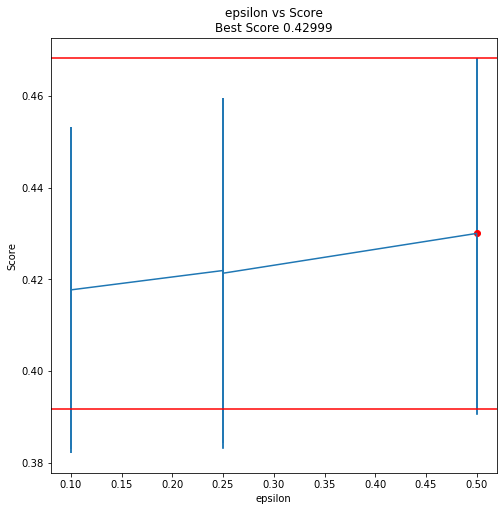

In [53]:
# Report best paramters
GridSearch_table_plot(grid_svr_acc, 'epsilon' ,negative=False, display_all_params=False)

Given these results we can try a new GridSearch exploring some more values

In [59]:
# Using GridSearchCV to fine tune the parameters of the model again
from sklearn.model_selection import GridSearchCV
model_opt2 = SVR()
grid_values2 = {'kernel': ['linear', 'rbf'],'C':[0.01, 0.05, 0.1], 'epsilon': [0.5,1,2]}
grid_svr_acc2 = GridSearchCV(model_opt2, param_grid = grid_values2, scoring = 'r2', cv = 3)

# I am only going to use the train data to make my the GridSearch less computationally expensive
grid_svr_acc2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1], 'epsilon': [0.5, 1, 2],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

best parameters: {'C': 0.01, 'epsilon': 0.5, 'kernel': 'linear'}
best score:      0.43255 (+/-0.03527)


,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.01,0.5,linear,"{'C': 0.01, 'epsilon': 0.5, 'kernel': 'linear'}",0.468615,0.444364,0.384672,0.432550,0.035273,1
6,0.05,0.5,linear,"{'C': 0.05, 'epsilon': 0.5, 'kernel': 'linear'}",0.468744,0.443472,0.379036,0.430417,0.037768,2
12,0.1,0.5,linear,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}",0.468839,0.443160,0.377982,0.429994,0.038243,3
2,0.01,1,linear,"{'C': 0.01, 'epsilon': 1, 'kernel': 'linear'}",0.423530,0.394367,0.350441,0.389446,0.030040,4
13,0.1,0.5,rbf,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}",0.396033,0.384649,0.383113,0.387931,0.005763,5
8,0.05,1,linear,"{'C': 0.05, 'epsilon': 1, 'kernel': 'linear'}",0.425626,0.393645,0.343171,0.387481,0.033943,6
14,0.1,1,linear,"{'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}",0.425694,0.393578,0.342534,0.387268,0.034242,7
7,0.05,0.5,rbf,"{'C': 0.05, 'epsilon': 0.5, 'kernel': 'rbf'}",0.364189,0.351369,0.354469,0.356676,0.005461,8
15,0.1,1,rbf,"{'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}",0.346395,0.329945,0.341972,0.339438,0.006951,9
9,0.05,1,rbf,"{'C': 0.05, 'epsilon': 1, 'kernel': 'rbf'}",0.301308,0.287469,0.301173,0.296650,0.006492,10


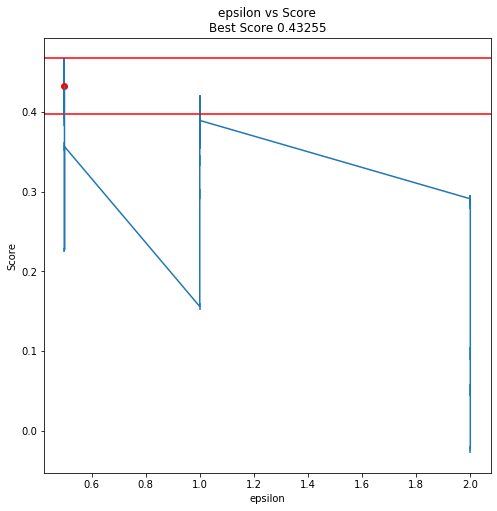

In [60]:
GridSearch_table_plot(grid_svr_acc2, 'epsilon' ,negative=False, display_all_params=False)

In [61]:
# Getting predictions for the optimized model
y_pred_opt = grid_svr_acc2.predict(X_test)
y_pred_opt_train = grid_svr_acc2.predict(X_train)

## Step 5: Assess expected accuracy

In [62]:
from sklearn.metrics import mean_squared_error

print('R2 for the model : ' + str(r2_score(y_test, y_pred_opt)))
print('Mean Squared Error for the model: ' + str(mean_squared_error(y_test, y_pred_opt)))

R2 for the model : 0.4330617384635319
Mean Squared Error for the model: 0.35866996680721325


In [72]:
grid_svr_acc2.best_estimator_

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
#Fit the model with the optimal parameters
from sklearn.svm import SVR
final_svr = SVR(kernel = 'linear', epsilon = 0.5, C = 0.01)
final_svr.fit(X_dummies, y_log)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
#Save the model
import pickle
filename = 'SVR.sav'
pickle.dump(final_svr, open(filename, 'wb'))

## Step 6: Assess variable importance

In [48]:
# We start by defining a function to retrieve and sort coefficients
def var_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

In [49]:
# Features names
feature_names = X_dummies.columns

# Visualize importance by coefficients
var_importances(abs(grid_svr_acc2.best_estimator_.coef_[0]), feature_names, top=10)

NameError: name 'grid_svr_acc2' is not defined

## Step 7: 

Prepare the code to *run* on a new input file and be able to report accuracy, following same preparation steps (missing data, dummies, etc)

In [50]:
#Lets save a list with thºe names of the columns we used to train our model
training_features_names = list(X_dummies)

In [51]:
#Save the list into a txt file to use later
with open("svr_training_features.txt", "w") as file:
    for col in training_features_names:
        file.write(str(col) + ',')

In [52]:
from IPython.core.debugger import set_trace
def generate_dummies(input_file, drop_percent):
    
    """This funcion takes an input file, loads its data, separates it into 
    the variable to predict (Y) and its features (X's) and generates the
    required dummy features.
    
    Warning: This function will only work if the column names in the provided
    input file as the same as the ones used for training.
    """
    
    import pandas as pd
    data = pd.read_csv(input_file)
    
    
    #Create dummies from the same variables as in the train dataset
    heating = pd.get_dummies(data.heatingtype, prefix = 'heating_type', drop_first = True)
    cities = pd.get_dummies(data.citycode, prefix = 'city' ,drop_first = True)
    tax_year = pd.get_dummies(data.taxyear, prefix = 'tax_year', drop_first = True)
    year = pd.get_dummies(data.year, prefix = 'year', drop_first = True)
    
    #Append this columns to the existing DataFrame
    data = data.join(heating).join(cities).join(tax_year).join(year)

    # Drop all the columns that are not in the train dataset
    # Read the file with the list of columns used in training
    with open("svr_training_features.txt", "r") as file:
        cols_training = file.read().split(',')
    
    cols_training = cols_training[:-1] 
    cols_training.append('parcelvalue')
    cols_training_filter = [i for i in cols_training if i in list(data)]
    
    data_final = data[cols_training_filter]
    
    #However, now there might be columns that were in the training dataset but not in the test new
    #We are going to add them with zero values for all rows
    
    #set_trace()
    not_in_test = [i for i in cols_training if i not in list(data_final)]
    
    for c in not_in_test:
        data_final = data_final.join(pd.DataFrame({c: [0]*data_final.shape[0]}))
    
    #Finally, drop rows with missing data
    data_final = data_final.dropna(axis = 0)
    
    # Split X's and the Y
    y = data_final["parcelvalue"]  # This is the classificatoin outcome: Parcel Value
    
    X = data_final.drop(['parcelvalue'], axis=1)
    
    return X, y
    

In [53]:
Xt, yt = generate_dummies('Data/Regression_Supervised_Test_1_reduced.csv', 0.4)

In [54]:
Xt

,numbath,numbedroom,qualitybuild,finishedarea,numfireplace,numfullbath,lotarea,roomnum,unitnum,heating_type_7.0,...,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_1886.0,year_1887.0,year_1890.0,year_1893.0,year_1908.0,year_1918.0
0,3.0,3,4.0,1618.0,0,3.0,19423.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3,4.0,1817.0,0,2.0,7625.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,8.0,1549.0,0,2.0,11080.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3,4.0,1275.0,0,3.0,58881.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,4,8.0,2379.0,0,3.0,12814.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,1.0,1,7.0,672.0,0,1.0,447679.0,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
5299,1.0,4,7.0,1140.0,0,1.0,6224.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5300,3.0,2,4.0,1368.0,0,3.0,6614.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5302,3.0,2,4.0,1506.0,0,3.0,280590.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
def scaling_features(X, scaler = None):
    """ This function takes an arrange of features (X) and rescales them using the scaler provider.
    The scaler provided should be the one used to train the model.
    """
    import sklearn
    
    if scaler is None:
        from sklearn import preprocessing
        scaler = preprocessing.StandardScaler().fit(X)
        X_scale = scaler.transform(X)
        print("NO SCALER PROVIDED. Used a DIFFERENT scaler")
        
    else:
        X_scale = scaler.transform(X)
        print("Used the scaler provided")
    
    return X_scale

In [56]:
X_scale = scaling_features(Xt,scaler)

Used the scaler provided


In [57]:
def model_performance(my_svr, X_test, y_test):
    """ This function reports the performance of the SVR model
    """
    
    #Transform prices to logarithms
    y_test = np.log(y_test)
    
    #Generate predictions
    y_pred = my_svr.predict(X_test)
    
    #Accuracy metrics for the model
    from sklearn.metrics import r2_score, mean_squared_error
    print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
    print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [58]:
#Load the optimal model from the file
import pickle
filename = 'SVR.sav'
final_svr = pickle.load(open(filename, 'rb'))
final_svr

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
model_performance(final_svr, X_scale, yt)

R2 for test data : -5.231426126459882
Mean Squared Error for test data: 4.247167906214062
